# Clasificación por Árboles de Decisión

In [5]:
import pandas as pd

data = pd.read_csv("datasets/iris.data", header=None, names=["SL", "SW", "PL", "PW", "C"])

data

,SL,SW,PL,PW,C
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
list(set(data["C"]))

['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

In [8]:
data["C2"] = data["C"].map({
    "Iris-setosa": 1,
    "Iris-versicolor": 2,
    "Iris-virginica": 3
})

In [9]:
data

,SL,SW,PL,PW,C,C2
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


In [11]:
data = data.sample(len(data))

data

,SL,SW,PL,PW,C,C2
61,5.9,3.0,4.2,1.5,Iris-versicolor,2
14,5.8,4.0,1.2,0.2,Iris-setosa,1
90,5.5,2.6,4.4,1.2,Iris-versicolor,2
135,7.7,3.0,6.1,2.3,Iris-virginica,3
0,5.1,3.5,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
30,4.8,3.1,1.6,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
63,6.1,2.9,4.7,1.4,Iris-versicolor,2
125,7.2,3.2,6.0,1.8,Iris-virginica,3


In [12]:
import numpy as np

x1 = np.array(data["SL"])
x2 = np.array(data["SW"])
x3 = np.array(data["PL"])
x4 = np.array(data["PW"])
y = np.array(data["C2"])

X = np.array([
    x1,
    x2,
    x3,
    x4
]).T

X_train = X[:120] # del principio hasta 120
X_test = X[120:] # de 120 hasta el final

y_train = y[:120]
y_test = y[120:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [13]:
X_train[0], y_train[0]

(array([5.9, 3. , 4.2, 1.5]), 2)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 37, 42]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.498\nsamples = 79\nvalue = [0, 37, 42]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

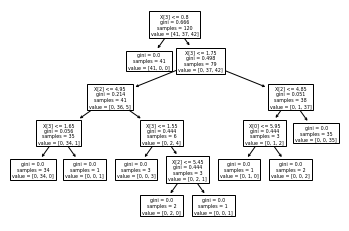

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

plot_tree(clf)

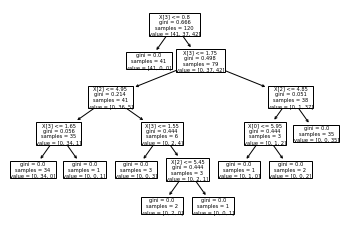

In [21]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 128})

plot_tree(clf)

plt.savefig("datasets/iris_tree.png")

In [22]:
data.describe()

,SL,SW,PL,PW,C2
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


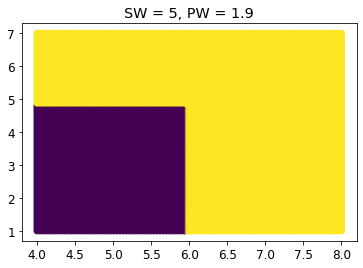

In [53]:
x1_l = np.linspace(4, 8, 100)
x2_l = np.ones(100) * 5
x3_l = np.linspace(1, 7, 100)
x4_l = np.ones(100) * 1.9

x1_m, x3_m = np.meshgrid(x1_l, x3_l)

X_m = np.array([
    x1_l,
    x2_l,
    x3_l,
    x4_l
]).T

y_predict = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        y_predict[i][j] = clf.predict([[
            x1_m[i][j], 
            5,
            x3_m[i][j],
            1.9
        ]])[0]

plt.title("SW = {}, PW = {}".format(5, 1.9));
plt.rcParams.update({'font.size': 12})
plt.scatter(x1_m, x3_m, c=y_predict)